Habrá cinco pasos en nuestra EDA:
1. Comprender el problema y las variables
2. Estudio univariante - sobre la variable dependiente
3. Estudio multivariado: relación entre variables dependientes e independientes
4. Limpieza básica: manejo de datos faltantes, valores atípicos y variables categóricas
5. Probar supuestos para técnicas multivariadas

#### Importando librerias y datos

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.options.display.float_format = '{:.5f}'.format

In [20]:
first = ['Apples', 'Oranges', 'Bananas']
quantities = [5, 3, 4]
price = [1.50, 2.25, 0.89]

output = []

fruit_tuple_0 = (first[0], quantities[0], price[0])
output.append(fruit_tuple_0)

fruit_tuple_1 = (first[1], quantities[1], price[1])
output.append(fruit_tuple_1)

fruit_tuple_2 = (first[2], quantities[2], price[2])
output.append(fruit_tuple_2)

output




[('Apples', 5, 1.5), ('Oranges', 3, 2.25), ('Bananas', 4, 0.89)]

In [19]:

i = 0
output = []
for fruit in fruits:
    temp_qty = quantities[i]
    temp_price = prices[i]
    output.append((fruit, temp_qty, temp_price))
    i += 1
    
output

[('Apples', 5, 1.5), ('Oranges', 3, 2.25), ('Bananas', 4, 0.89)]

In [36]:
num_list =[21,np.nan,19,3,11,5,18]

list(np.ones(6)*4)+num_list

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 21, nan, 19, 3, 11, 5, 18]

In [662]:
pd.set_option('display.max_rows',60)
pd.set_option('display.max_columns',60)

In [260]:
df = pd.read_csv('houses_Madrid.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [198]:
#Aqui me di cuenta que estos son los elementos que debo borrar porque si no tienes varios pisos vives en un piso
df[pd.isnull(df['n_floors']) & pd.isnull(df['floor'])]

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
8,8,21734,Piso en venta en Butarque,"Villaverde, Madrid",84.000,70.000,3,2.000,NaN,NaN,...,F,True,NaN,NaN,True,0.000,NaN,NaN,NaN,NaN
37,37,21705,Piso en venta en paseo de Alberto Palacios,"San Andrés, Madrid",60.000,1.000,2,1.000,NaN,NaN,...,A,False,NaN,NaN,NaN,NaN,False,False,True,False
52,52,21690,Piso en venta en Los Rosales,"Villaverde, Madrid",65.000,52.000,2,1.000,NaN,NaN,...,G,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,130,21612,"Piso en venta en calle Alcocer, 39","Los Ángeles, Madrid",54.000,NaN,2,1.000,NaN,NaN,...,E,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,168,21574,Piso en venta en calle Eduardo Minguito,"Los Rosales, Madrid",48.000,39.000,2,1.000,NaN,NaN,...,E,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,21653,89,Chalet pareado en venta en Nueva España,"Chamartín, Madrid",474.000,NaN,6,4.000,NaN,388.000,...,en trámite,True,NaN,NaN,True,0.000,NaN,NaN,NaN,NaN
21663,21663,79,Chalet pareado en venta en calle Mateo Inurri...,"Nueva España, Madrid",351.000,NaN,4,5.000,NaN,221.000,...,en trámite,True,NaN,NaN,True,0.000,NaN,NaN,NaN,NaN
21673,21673,69,Casa o chalet independiente en venta en calle...,"El Viso, Madrid",469.000,NaN,5,6.000,NaN,1.000,...,en trámite,True,NaN,NaN,True,0.000,NaN,NaN,NaN,NaN
21720,21720,22,Casa o chalet independiente en venta en Campo...,"Barajas, Madrid",334.000,NaN,5,3.000,NaN,407.000,...,E,True,NaN,NaN,True,0.000,NaN,NaN,NaN,NaN


### Limpieza de la base de datos

* Claramente todas las columnas con valores que esten conformadas completamente con valores nulos deben no ser tomadas en cuenta.

* También debemos quitar todas las filas que esten completamente vacias.(En este caso no habia niguna)

<AxesSubplot:>

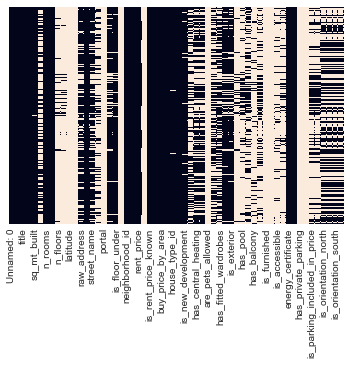

In [331]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [407]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(45)

,Total,Percent
has_private_parking,21742,1.000
door,21742,1.000
portal,21742,1.000
is_furnished,21742,1.000
rent_price_by_area,21742,1.000
longitude,21742,1.000
latitude,21742,1.000
has_public_parking,21742,1.000
is_kitchen_equipped,21742,1.000
are_pets_allowed,21742,1.000


In [742]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','Skew','Kurt'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].dtype !='bool' and pd.isnull(df[col]).all()!=True:
            
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0], df[col].mean(),df[col].min(), df[col].quantile(0.25), df[col].median(),
                                  df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                                   '-' if pd.isnull(df[col]).all() else df[col].mode().values[0],'-','-','-','-','-','-','-','-','-']
    return output_df.sort_values(by=['Numeric', 'Skew','Unique'],ascending=False)

In [261]:
cleaner_df = df.dropna(how = 'all', axis = 'columns')

cleaner_df = cleaner_df.dropna(how = 'all')

#Eliminando la columna index por defecto de la bbdd
cleaner_df.drop('Unnamed: 0',
  axis='columns', inplace=True)

#Arreglando el index
cleaner_df.reset_index()
cleaner_df.set_index('id',inplace=True)


#Ordenando por el index
cleaner_df.sort_index(inplace=True)

In [743]:
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
is_exact_address_hidden,21742,0,2,bool,True,True,-,-,-,-,-,-,-,-,-
is_renewal_needed,21742,0,2,bool,True,False,-,-,-,-,-,-,-,-,-
has_parking,21742,0,2,bool,True,False,-,-,-,-,-,-,-,-,-
is_rent_price_known,21742,0,1,bool,True,False,-,-,-,-,-,-,-,-,-
is_buy_price_known,21742,0,1,bool,True,True,-,-,-,-,-,-,-,-,-
latitude,0,21742,0,float64,True,-,-,-,-,-,-,-,-,-,-
longitude,0,21742,0,float64,True,-,-,-,-,-,-,-,-,-,-
portal,0,21742,0,float64,True,-,-,-,-,-,-,-,-,-,-
door,0,21742,0,float64,True,-,-,-,-,-,-,-,-,-,-
rent_price_by_area,0,21742,0,float64,True,-,-,-,-,-,-,-,-,-,-


In [768]:
def anova(df, feature, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    groups = df[feature].unique() #Paso 1- Usar unique para generar una lista de 
                                #valores unicos en la propia columna categorica
    df_grouped = df.groupby(feature) #Paso 2- Usar el groupby para unique para ordenar
                                    #el Dataframe por la columna en cuestion
    
    group_labels = []            #Paso 3- Crear una lista vacia que sera una lista bidimensional
                                #de listas para guardar los valores asociociados con cada categoria
    
    for g in groups:             #Paso 4- Un loop a traves de los diferentes valores de la variable
        
        g_list = df_grouped.get_group(g)  #Paso 5 - Usar la funcion get_group para 
                                    #tener una la lista correspondiente a cada valor
        
        group_labels.append(g_list[label]) #Paso 6 - Uso append para ir guardando la lista de valoroes 
                                     #creados en el paso anterior   
    
    return stats.f_oneway(*group_labels) #La marca * es una manera de dinamicamente adicionar cada grupo en 
                                        #una lista de listas


In [805]:
def bivastats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Creo un Dataframe vacio para almacenar mis output de interes
    output_df = pd.DataFrame(columns=['Stat','+/-','ValorAbs','p-valor'])

    for col in df:
        if not col == label:
            if df[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(df[col]) and df[col].dtype !='bool':
                    r,p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r','-' if np.sign(r)==-1 else '+',abs(round(r,3)), round(p,6)]
                    scatter(df[col],df[label])
                else:
                    F ,p = anova(df[[col,label]],col,label)
                    output_df.loc[col] = ['F', '',round(F,3),round(p,5)]
                    bar_chart( df, col, label)
            else:
                output_df.loc[col] = [np.nan,np.nan,np.nan, np.nan]

    
    return output_df.sort_values(by=['Stat','ValorAbs'], ascending=[False,False])

        
    


    


In [200]:
#NO
#Soltando la columna sq_mt_useful al tener menos de la mitad de entradas vacias(8228)
cleaner_df.drop('sq_mt_useful',
  axis='columns', inplace=True)

In [178]:
#NO
#Decido eliminar la columna n_floors al encontrarme chalets con un solo piso y 5 cuartos ademas que la columna estaba casi completa vacia
cleaner_df.drop('n_floors',
  axis='columns', inplace=True)

In [264]:
#Columna casi vacia
cleaner_df.drop('sq_mt_allotment',
  axis='columns', inplace=True)

In [265]:
#Eliminando las filas con la columna baño en null
cleaner_df = cleaner_df[pd.notnull(cleaner_df['n_bathrooms'])]

In [266]:
#Eliminando las filas con la columna sq_mt_built en null 
cleaner_df = cleaner_df[pd.notnull(cleaner_df['sq_mt_built'])]

In [269]:
#cleaner_df[pd.isnull(cleaner_df['raw_address'])]

#cleaner_df['raw_address']

cleaner_df = cleaner_df[pd.notnull(cleaner_df['n_floors']) | pd.notnull(cleaner_df['floor'])]

In [272]:
#cleaner_df[(cleaner_df['house_type_id'] == 'HouseType 2: Casa o chalet') & (pd.notnull(cleaner_df['n_floors']))]
#Quitando las filas con el campo house_type_id vacias
cleaner_df = cleaner_df[pd.notnull(cleaner_df['house_type_id'])]

In [274]:
#cleaner_df[pd.isnull(cleaner_df['is_new_development'])]
#Quitando las filas con el campo is_new_development vacio
cleaner_df = cleaner_df[pd.notnull(cleaner_df['is_new_development'])]

In [275]:
cleaner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19310 entries, 2 to 21742
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         19310 non-null  object 
 1   subtitle                      19310 non-null  object 
 2   sq_mt_built                   19310 non-null  float64
 3   sq_mt_useful                  7322 non-null   float64
 4   n_rooms                       19310 non-null  int64  
 5   n_bathrooms                   19310 non-null  float64
 6   n_floors                      1312 non-null   float64
 7   raw_address                   14537 non-null  object 
 8   is_exact_address_hidden       19310 non-null  bool   
 9   street_name                   14207 non-null  object 
 10  street_number                 5748 non-null   object 
 11  floor                         17998 non-null  object 
 12  is_floor_under                19310 non-null  object 
 13  n

In [288]:
#Quito las filas que no tienen rellenado la columna de si tiene o no elevador
#Tcleaner_df = cleaner_df[pd.notnull(cleaner_df['has_lift'])]
#Tcleaner_df = cleaner_df[pd.notnull(cleaner_df['has_storage_room'])]

for i in cleaner_df.columns[-15:]:
    print(i," : ", cleaner_df[i].unique())


has_garden  :  [True nan]
has_pool  :  [nan True]
has_terrace  :  [True nan]
has_balcony  :  [True nan]
has_storage_room  :  [True nan]
is_accessible  :  [nan True]
has_green_zones  :  [nan True]
energy_certificate  :  ['en trámite' 'E' 'no indicado' 'G' 'B' 'A' 'F' 'D' 'C' 'inmueble exento']
has_parking  :  [ True False]
is_parking_included_in_price  :  [True nan False]
parking_price  :  [0.0000e+00        nan 3.0000e+04 1.2000e+04 7.5000e+04 3.5000e+04
 5.5000e+04 6.0000e+03 1.8000e+04 2.5000e+04 4.0000e+04 1.6000e+04
 7.0000e+03 2.7000e+04 3.3000e+04 2.0000e+04 3.7000e+04 1.5000e+04
 1.1000e+02 8.0000e+04 5.0000e+04 1.6500e+02 4.5000e+04 1.4550e+04
 7.0000e+04 6.5000e+04 9.5000e+04 1.8000e+02 5.0000e+01 2.0000e+02
 2.5000e+02 3.9000e+04 1.8500e+02 1.2000e+05 6.0000e+04 1.0000e+00
 1.5000e+02 4.4000e+04 5.1500e+04 7.8000e+04 1.0000e+05 2.3000e+04
 1.7000e+04 1.0000e+04 1.9000e+04 2.2000e+04 1.3000e+02 2.9000e+04
 1.6500e+04 2.6000e+04 1.9000e+02 5.4030e+03 4.2000e+04 8.5000e+04
 1.20

De esta último output me lleva a revisar un muestreo de las filas con la columnas has_terrace vacias el resto de las columnas cuyos valores se mueven entre nan y true por el momento no las tocare

In [299]:
cleaner_df[(pd.isnull(cleaner_df['has_terrace'])) & (cleaner_df['buy_price']>1000000)]

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,raw_address,is_exact_address_hidden,street_name,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
65,Chalet adosado en venta en El Viso,"Chamartín, Madrid",432.000,NaN,2,3.000,4.000,NaN,True,NaN,...,NaN,NaN,en trámite,True,True,0.000,NaN,NaN,NaN,NaN
66,Piso en venta en El Viso,"Chamartín, Madrid",220.000,NaN,4,3.000,NaN,NaN,True,NaN,...,NaN,NaN,en trámite,True,True,0.000,NaN,NaN,NaN,NaN
71,Piso en venta en calle del Príncipe de Vergara,"El Viso, Madrid",250.000,NaN,4,4.000,NaN,Calle del Príncipe de Vergara,True,Calle del Príncipe de Vergara,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
72,Piso en venta en calle de María de Molina,"El Viso, Madrid",399.000,NaN,5,5.000,NaN,Calle de María de Molina,True,Calle de María de Molina,...,NaN,NaN,F,True,True,0.000,False,False,True,False
77,Piso en venta en calle maria de molina,"El Viso, Madrid",399.000,NaN,5,4.000,NaN,Calle maria de molina,True,Calle maria de molina,...,NaN,NaN,E,True,True,0.000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19205,"Piso en venta en paseo de la Castellana, 153","Cuzco-Castillejos, Madrid",195.000,NaN,3,2.000,NaN,"Paseo de la Castellana, 153",False,Paseo de la Castellana,...,True,NaN,D,True,True,0.000,False,True,False,False
19216,Piso en venta en Cuatro Caminos,"Tetuán, Madrid",185.000,NaN,2,1.000,NaN,NaN,True,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,True,False,False,True
19225,Dúplex en venta en Cuzco-Castillejos,"Tetuán, Madrid",295.000,261.000,4,4.000,NaN,NaN,True,NaN,...,NaN,NaN,en trámite,True,True,0.000,NaN,NaN,NaN,NaN


El muestreo de la columna has_terrace no me lleva a tomarla en cuenta los valores no llegan a ser conclusivos ni se observa una utilidad real a la hora de analizar los datos.

In [278]:
#Los 1312 inmuebles que tienen rellenado el campo numero de pisos estan vacios en el campo tiene elevador
cleaner_df[pd.isnull(cleaner_df['has_lift']) & pd.notnull(cleaner_df['n_floors'])]

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,raw_address,is_exact_address_hidden,street_name,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.000,NaN,4,3.000,3.000,"Calle Burriana, 12",False,Calle Burriana,...,NaN,NaN,en trámite,True,True,0.000,False,False,True,False
11,Chalet adosado en venta en calle Siroco,"Timón, Madrid",276.000,NaN,4,4.000,4.000,Calle Siroco,True,Calle Siroco,...,NaN,NaN,G,True,True,0.000,NaN,NaN,NaN,NaN
12,Chalet adosado en venta en calle Benito Monfort,"Alameda de Osuna, Madrid",289.000,NaN,5,3.000,3.000,Calle Benito Monfort,True,Calle Benito Monfort,...,NaN,NaN,no indicado,True,True,0.000,NaN,NaN,NaN,NaN
21,Casa o chalet independiente en venta en Timón,"Barajas, Madrid",362.000,NaN,6,3.000,3.000,NaN,True,NaN,...,NaN,NaN,E,False,NaN,NaN,NaN,NaN,NaN,NaN
29,Chalet adosado en venta en calle Benito Monfort,"Alameda de Osuna, Madrid",290.000,NaN,5,3.000,4.000,Calle Benito Monfort,True,Calle Benito Monfort,...,NaN,NaN,en trámite,True,True,0.000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,"Chalet adosado en venta en calle Tres Cantos, 1","El Cañaveral - Los Berrocales, Madrid",285.000,NaN,4,3.000,4.000,"Calle Tres Cantos, 1",False,Calle Tres Cantos,...,True,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
21211,Casa o chalet independiente en venta en calle...,"Los Rosales, Madrid",274.000,244.000,8,3.000,3.000,"Calle Leonor Góngora, 46",False,Calle Leonor Góngora,...,NaN,NaN,no indicado,False,NaN,NaN,False,True,False,True
21340,Casa o chalet independiente en venta en alto ...,"San Andrés, Madrid",242.000,210.000,4,3.000,4.000,Alto Villaverde s/n,False,NaN,...,NaN,NaN,no indicado,True,True,0.000,NaN,NaN,NaN,NaN


In [255]:
#Se van las columnas de calefaccion
#cleaner_df['has_central_heating'].unique()

#cleaner_df[pd.isnull(cleaner_df['has_central_heating']) & pd.isnull(cleaner_df['has_individual_heating'])]

cleaner_df['has_lift'].unique()

#cleaner_df[cleaner_df['has_lift']==False]
#cleaner_df[cleaner_df['has_storage_room']==False]

array([nan, False, True], dtype=object)

La columna built_year apriori se observa como una variable importante por lo que luego de analizarla con detalles eliminare para mi Data Frame final solo aquellas casas que tengan este dato

In [305]:
cleaner_df[pd.isnull(cleaner_df['built_year'])][['title','subtitle','buy_price']]


,title,subtitle,buy_price
id,,,
6,Piso en venta en calle Bahía de Alicante,"Campo de las Naciones-Corralejos, Madrid",349000
7,Piso en venta en calle Bahía de Almería,"Campo de las Naciones-Corralejos, Madrid",360000
12,Chalet adosado en venta en calle Benito Monfort,"Alameda de Osuna, Madrid",820000
14,Piso en venta en calle Tintín y Milú,"Alameda de Osuna, Madrid",530000
15,Piso en venta en calle de La Rioja,"Alameda de Osuna, Madrid",328000
...,...,...,...
21731,Piso en venta en Butarque,"Villaverde, Madrid",246900
21735,Piso en venta en San Andrés,"Villaverde, Madrid",198500
21736,Piso en venta en avenida Real de Pinto,"San Andrés, Madrid",190000


In [316]:
#Duplicados en mi Dataset
s = cleaner_df.duplicated()
ids = cleaner_df.index[s == True].tolist()
cd = cleaner_df.loc[ids,:]
cd.sort_values('sq_mt_built')

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,raw_address,is_exact_address_hidden,street_name,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
4946,Piso en venta en calle Ramón Sainz,"Vista Alegre, Madrid",35.000,NaN,1,1.000,NaN,Calle Ramón Sainz,True,Calle Ramón Sainz,...,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
18385,"Piso en venta en Tablada, 38","Berruguete, Madrid",35.000,30.000,1,1.000,NaN,"Tablada, 38",False,Tablada,...,NaN,NaN,no indicado,False,NaN,NaN,False,False,True,False
16935,Piso en venta en calle Picos de Europa,"Numancia, Madrid",37.000,NaN,1,1.000,NaN,Calle Picos de Europa,True,Calle Picos de Europa,...,NaN,NaN,D,False,NaN,NaN,True,False,False,False
16934,Piso en venta en calle Picos de Europa,"Numancia, Madrid",37.000,NaN,1,1.000,NaN,Calle Picos de Europa,True,Calle Picos de Europa,...,NaN,NaN,D,False,NaN,NaN,True,False,False,False
1254,Piso en venta en Palos de Moguer,"Arganzuela, Madrid",39.000,NaN,2,1.000,NaN,NaN,True,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16006,Piso en venta en Aravaca,"Moncloa, Madrid",307.000,NaN,5,4.000,NaN,NaN,True,NaN,...,NaN,True,en trámite,True,True,0.000,False,False,True,False
13117,Chalet adosado en venta en calle Gloria Fuert...,"Arroyo del Fresno, Madrid",316.000,NaN,4,4.000,4.000,"Calle Gloria Fuertes, 105",False,Calle Gloria Fuertes,...,NaN,NaN,A,True,True,0.000,NaN,NaN,NaN,NaN
9651,Piso en venta en Almagro,"Chamberí, Madrid",340.000,NaN,4,5.000,NaN,NaN,True,NaN,...,NaN,NaN,en trámite,True,True,0.000,False,False,True,False


In [317]:
cleaned_df = cleaner_df.drop_duplicates()

In [318]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19146 entries, 2 to 21742
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         19146 non-null  object 
 1   subtitle                      19146 non-null  object 
 2   sq_mt_built                   19146 non-null  float64
 3   sq_mt_useful                  7280 non-null   float64
 4   n_rooms                       19146 non-null  int64  
 5   n_bathrooms                   19146 non-null  float64
 6   n_floors                      1307 non-null   float64
 7   raw_address                   14405 non-null  object 
 8   is_exact_address_hidden       19146 non-null  bool   
 9   street_name                   14077 non-null  object 
 10  street_number                 5738 non-null   object 
 11  floor                         17839 non-null  object 
 12  is_floor_under                19146 non-null  object 
 13  n

In [306]:
cleaner_df.columns

Index(['title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'raw_address', 'is_exact_address_hidden',
       'street_name', 'street_number', 'floor', 'is_floor_under',
       'neighborhood_id', 'operation', 'rent_price', 'is_rent_price_known',
       'buy_price', 'buy_price_by_area', 'is_buy_price_known', 'house_type_id',
       'is_renewal_needed', 'is_new_development', 'built_year',
       'has_central_heating', 'has_individual_heating', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_accessible', 'has_green_zones', 'energy_certificate', 'has_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'],
      dtype='object')

### Defino mi DataFrame de trabajo work_df

In [319]:
work_df = cleaned_df[['sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors','floor','operation', 'rent_price', 'is_rent_price_known',
       'buy_price', 'buy_price_by_area', 'is_buy_price_known', 'house_type_id',
       'is_renewal_needed', 'is_new_development', 'built_year',
        'energy_certificate', 'has_parking','is_parking_included_in_price', 'parking_price']]

In [320]:
work_df = work_df[pd.notnull(work_df['built_year'])]

In [321]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9027 entries, 2 to 21742
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   9027 non-null   float64
 1   sq_mt_useful                  4365 non-null   float64
 2   n_rooms                       9027 non-null   int64  
 3   n_bathrooms                   9027 non-null   float64
 4   n_floors                      720 non-null    float64
 5   floor                         8307 non-null   object 
 6   operation                     9027 non-null   object 
 7   rent_price                    9027 non-null   int64  
 8   is_rent_price_known           9027 non-null   bool   
 9   buy_price                     9027 non-null   int64  
 10  buy_price_by_area             9027 non-null   int64  
 11  is_buy_price_known            9027 non-null   bool   
 12  house_type_id                 9027 non-null   object 
 13  is

 Al ver que estos dos campos se sincronizan en cuanto valores decido coger mi muestra a partir que no este  vacio estos campos y por el tamaño me sigo asegurando una buena representación

In [323]:
work_df[pd.notnull(work_df['is_parking_included_in_price']) & pd.notnull(work_df['parking_price'])]

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,energy_certificate,has_parking,is_parking_included_in_price,parking_price
id,,,,,,,,,,,,,,,,,,,,
2,289.000,NaN,4,3.000,3.000,NaN,sale,2115,False,695000,2405,True,HouseType 2: Casa o chalet,False,False,1981.000,en trámite,True,True,0.000
3,175.000,NaN,4,2.000,NaN,Bajo,sale,2081,False,680000,3886,True,HouseType 1: Pisos,False,False,2002.000,E,True,True,0.000
4,96.000,83.000,2,2.000,NaN,3,sale,1496,False,425000,4427,True,HouseType 1: Pisos,False,False,2002.000,en trámite,True,True,0.000
5,78.000,NaN,2,2.000,NaN,4,sale,1323,False,350000,4487,True,HouseType 5: Áticos,False,False,2020.000,en trámite,True,True,0.000
10,74.000,NaN,2,1.000,NaN,Entreplanta exterior,sale,1037,False,239500,3236,True,HouseType 1: Pisos,False,False,1988.000,G,True,True,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21697,83.000,69.000,2,2.000,NaN,7,sale,1004,False,228273,2750,True,HouseType 5: Áticos,False,False,2020.000,en trámite,True,True,0.000
21711,123.000,NaN,3,2.000,NaN,7,sale,1195,False,298000,2423,True,HouseType 1: Pisos,False,False,2002.000,en trámite,True,True,0.000
21716,75.000,68.000,3,1.000,NaN,3,sale,698,False,138000,1840,True,HouseType 1: Pisos,False,False,1984.000,inmueble exento,True,True,0.000


In [324]:
work_df = work_df[pd.notnull(work_df['is_parking_included_in_price'])]

In [325]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 2 to 21738
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   3264 non-null   float64
 1   sq_mt_useful                  1395 non-null   float64
 2   n_rooms                       3264 non-null   int64  
 3   n_bathrooms                   3264 non-null   float64
 4   n_floors                      590 non-null    float64
 5   floor                         2674 non-null   object 
 6   operation                     3264 non-null   object 
 7   rent_price                    3264 non-null   int64  
 8   is_rent_price_known           3264 non-null   bool   
 9   buy_price                     3264 non-null   int64  
 10  buy_price_by_area             3264 non-null   int64  
 11  is_buy_price_known            3264 non-null   bool   
 12  house_type_id                 3264 non-null   object 
 13  is

Ahora tenemos dos columnas también sincronizadas n_floors(# de pisos) y floor(piso) en cuanto que cuando una es nan la otra tiene el piso en donde se encuentra el inmueble entonces yo he analizado que quizas el piso individualemente no me va a aportar mucha información por si solo con respecto al precio sin embargo el hecho que una casa tenga varios pisos si por lo que decidí eliminar la columna floor y rellenar con 1 todas los n_floor vacios indicando que son pisos o casa de una sola planta

In [344]:
work_df['n_floors']=work_df['n_floors'].fillna(1)

In [347]:
work_df.drop('floor',axis='columns',inplace=True)

Como buena practica se puede observar que la columna sq_mt_useful cuando esta rellena su valor representa entre un 85-94% del valor del cammpo sq_mt_built entonces para contar con más variables independientes procederemos a rellenarla

In [358]:
work_df['sq_mt_useful'] = work_df['sq_mt_useful'].fillna(work_df['sq_mt_built']*0.88)

Aqui encontramos que hay valores de renta negativos lo cual no tendría sentido para nuestro análisis por lo que hemos de suponer que el valor de renta representa el valor absoluto para cada caso

In [374]:
work_df.rent_price=abs(work_df.rent_price)

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,energy_certificate,has_parking,is_parking_included_in_price,parking_price
id,,,,,,,,,,,,,,,,,,,


In [388]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 2 to 21738
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   3264 non-null   float64
 1   sq_mt_useful                  3264 non-null   float64
 2   n_rooms                       3264 non-null   int64  
 3   n_bathrooms                   3264 non-null   int64  
 4   n_floors                      3264 non-null   int64  
 5   operation                     3264 non-null   object 
 6   rent_price                    3264 non-null   float64
 7   is_rent_price_known           3264 non-null   bool   
 8   buy_price                     3264 non-null   float64
 9   buy_price_by_area             3264 non-null   float64
 10  is_buy_price_known            3264 non-null   bool   
 11  house_type_id                 3264 non-null   object 
 12  is_renewal_needed             3264 non-null   bool   
 13  is

Arreglando los formatos de los distintos indicadores

In [387]:
work_df = work_df.astype({"n_bathrooms": 'int64',"n_floors": 'int64',
                          "rent_price": float, "buy_price": float, 
                          "buy_price_by_area": float, "built_year": 'int64'})

# Análisis de dispersión con visuales y numéricos

Para entender el problema y las variables (que son muchas en este caso) se necesitó hacer una tarea simple analizar todas las columnas para cada variable (que lleva mucho tiempo, pero vale la pena). Después de hacer eso, miraremos las variables con expectativa 'Alta' y desplegaremos algunos diagramas de dispersión entre esas variables y buy_price.

In [392]:
#Eliminando la notación científica para una mejor y rápida comprención de los datos
pd.set_option('display.float_format', lambda x: '%.3f' % x)

work_df['buy_price'].describe()

count      3264.000
mean     958305.443
std      895553.974
min       61000.000
25%      359999.750
50%      650000.000
75%     1263750.000
max     8700000.000
Name: buy_price, dtype: float64

### Manejo de Outliers

In [476]:
min_thresold, max_thresold = work_df.buy_price.quantile([0.001, 0.995])
min_thresold, max_thresold

(107567.9, 4977399.999999998)

In [477]:
work_df[work_df.buy_price<min_thresold]

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,energy_certificate,has_parking,is_parking_included_in_price,parking_price
id,,,,,,,,,,,,,,,,,,,
16269,59.000,55.000,3,1,1,sale,353.000,False,61000.000,1034.000,True,HouseType 1: Pisos,True,False,1984,no indicado,True,True,0.000
19449,85.000,74.800,2,1,1,sale,569.000,False,106700.000,1255.000,True,HouseType 1: Pisos,False,False,2000,en trámite,True,True,0.000
19916,52.000,48.000,1,1,1,sale,489.000,False,89000.000,1712.000,True,HouseType 1: Pisos,False,False,2006,F,True,True,0.000
20214,48.000,42.240,1,2,1,sale,539.000,False,100000.000,2083.000,True,HouseType 4: Dúplex,True,False,2008,en trámite,True,True,0.000


In [478]:
work_df[work_df.buy_price>max_thresold]

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,energy_certificate,has_parking,is_parking_included_in_price,parking_price
id,,,,,,,,,,,,,,,,,,,
2040,706.000,621.280,6,7,1,sale,9377334.000,False,6500000.000,9207.000,True,HouseType 1: Pisos,False,False,2008,C,True,True,0.000
2368,547.000,481.360,6,5,1,sale,2937084.000,False,5000000.000,9141.000,True,HouseType 1: Pisos,True,False,1920,no indicado,True,True,0.000
6013,852.000,749.760,6,6,3,sale,21807395.000,False,7900000.000,9272.000,True,HouseType 2: Casa o chalet,False,False,1980,en trámite,True,True,0.000
6025,825.000,726.000,7,7,4,sale,21807395.000,False,7900000.000,9576.000,True,HouseType 2: Casa o chalet,False,False,1980,en trámite,True,True,0.000
6293,900.000,415.000,9,7,4,sale,5687491.000,False,5800000.000,6444.000,True,HouseType 2: Casa o chalet,False,False,1941,E,True,True,0.000
6433,524.000,461.120,7,5,3,sale,2937081.000,False,4999999.000,9542.000,True,HouseType 2: Casa o chalet,False,False,1948,en trámite,True,True,0.000
6865,670.000,589.600,6,6,4,sale,6603834.000,False,6000000.000,8955.000,True,HouseType 2: Casa o chalet,True,False,1960,en trámite,True,True,0.000
6917,900.000,800.000,9,7,4,sale,5687491.000,False,5800000.000,6444.000,True,HouseType 2: Casa o chalet,False,False,1960,en trámite,True,True,0.000
6922,500.000,450.000,6,5,1,sale,6603834.000,False,6000000.000,12000.000,True,HouseType 5: Áticos,True,False,1973,no indicado,True,True,0.000


In [482]:
work_df = work_df[(work_df.buy_price<max_thresold) & (work_df.buy_price>min_thresold)]
work_df.shape

(3243, 19)

In [491]:
min_thresold, max_thresold = work_df.rent_price.quantile([0.002, 0.995])
min_thresold, max_thresold

(94.0, 1328484.0)

In [495]:
work_df[work_df.rent_price<550]

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,energy_certificate,has_parking,is_parking_included_in_price,parking_price
id,,,,,,,,,,,,,,,,,,,
181,470.000,413.600,6,5,4,sale,221.000,False,1395000.000,2968.000,True,HouseType 2: Casa o chalet,False,False,1995,en trámite,True,True,0.000
203,429.000,377.520,5,6,4,sale,452.000,False,1350000.000,3147.000,True,HouseType 2: Casa o chalet,False,False,1992,en trámite,True,True,0.000
207,423.000,372.240,6,6,4,sale,18.000,False,1380000.000,3262.000,True,HouseType 2: Casa o chalet,False,False,1990,en trámite,True,True,0.000
233,467.000,410.960,5,4,3,sale,221.000,False,1395000.000,2987.000,True,HouseType 2: Casa o chalet,False,False,1995,E,True,True,0.000
238,467.000,410.960,6,5,4,sale,221.000,False,1395000.000,2987.000,True,HouseType 2: Casa o chalet,False,False,1995,en trámite,True,True,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,800.000,704.000,4,4,2,sale,452.000,False,1350000.000,1688.000,True,HouseType 2: Casa o chalet,True,False,1972,en trámite,True,True,0.000
14968,350.000,308.000,6,6,4,sale,140.000,False,1390000.000,3971.000,True,HouseType 2: Casa o chalet,False,False,2003,E,True,True,0.000
14983,359.000,315.920,6,4,4,sale,140.000,False,1390000.000,3872.000,True,HouseType 2: Casa o chalet,False,False,2003,en trámite,True,True,0.000


In [493]:
work_df[work_df.rent_price>max_thresold]

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,energy_certificate,has_parking,is_parking_included_in_price,parking_price
id,,,,,,,,,,,,,,,,,,,
1599,383.000,337.040,6,4,1,sale,1402943.000,False,4250000.000,11097.000,True,HouseType 1: Pisos,True,False,1914,en trámite,True,True,0.000
1606,404.000,355.520,5,6,1,sale,1561161.000,False,4350000.000,10767.000,True,HouseType 1: Pisos,False,False,1959,en trámite,True,True,0.000
1795,404.000,355.520,5,6,1,sale,1561161.000,False,4350000.000,10767.000,True,HouseType 1: Pisos,False,False,1954,E,True,True,0.000
2058,404.000,355.520,5,5,1,sale,1561161.000,False,4350000.000,10767.000,True,HouseType 1: Pisos,False,False,1959,en trámite,True,True,0.000
2946,776.000,682.880,6,5,1,sale,1823000.000,False,4500000.000,5799.000,True,HouseType 4: Dúplex,False,False,1950,en trámite,True,True,0.000
6002,720.000,633.600,6,7,4,sale,2807303.000,False,4950000.000,6875.000,True,HouseType 2: Casa o chalet,True,False,1960,E,True,True,0.000
6582,446.000,392.480,6,4,2,sale,1645087.000,False,4400000.000,9865.000,True,HouseType 2: Casa o chalet,True,False,1968,en trámite,True,True,0.000
6607,371.000,326.480,5,4,1,sale,1823000.000,False,4500000.000,12129.000,True,HouseType 1: Pisos,False,False,1960,en trámite,True,True,0.000
7254,400.000,352.000,5,4,4,sale,2352873.000,False,4760000.000,11900.000,True,HouseType 2: Casa o chalet,False,False,2017,C,True,True,0.000


In [496]:
work_df = work_df[(work_df.rent_price<max_thresold) & (work_df.rent_price>550)]
work_df.shape

(3154, 19)

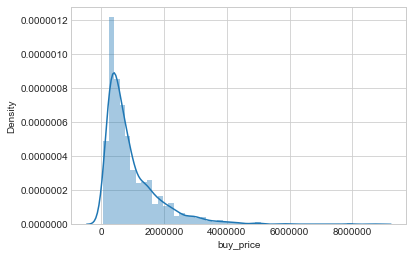

In [393]:
#histograma
ax = sns.distplot(work_df['buy_price']);
#Quito la notación cientifica para una mejor comprensión
plt.ticklabel_format(style='plain')

### Coeficiente de asimetría(Skewness)
 Existen varios pero se interpretan de manera parecida:

* simetría=0 : Distribución simétrica

* asimetría>0: Distribución asimétrica a la derecha

* asimetría<0: Distribución asimétrica a la izquierda



### Curtósis

* Si kurtosis<3 la distribución es Platicúrtica

* Si kurtosis=3 la distribución es Mesocúrtica

* Si kurtosis>3 la distribución es Leptocúrtica

 Se compara la kurtosis con 3 porque este es el valor la kurtosis para la distribución N(μ,σ2).
 
 En este caso como se puede ver claramente en el histograma no hay una distribución muestral normal y los datos tienen una asimetría positiva y una cola larga (mostrada por un valor de curtosis alto y el valor del coeficiente asimétrico positivo)

In [395]:
#Skewness and Kurtosis
print('Skewness: %f' %work_df['buy_price'].skew())
print("Kurtosis: %f" %work_df['buy_price'].kurt())

Skewness: 2.559022
Kurtosis: 10.701790


In [776]:
unistats(work_df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
is_renewal_needed,3154,0,2,bool,True,False,-,-,-,-,-,-,-,-,-
parking_price,3154,0,59,float64,True,0.00000,2926.96829,0.00000,0.00000,0.00000,0.00000,600000.00000,14837.61997,22.22115,836.43012
rent_price,3154,0,631,float64,True,2514.00000,24689.88364,583.00000,1275.00000,1850.00000,2457.00000,1268252.00000,103439.88827,6.85102,54.49262
n_floors,3154,0,5,int64,True,1.00000,1.39188,1.00000,1.00000,1.00000,1.00000,5.00000,0.93486,2.18237,3.18878
sq_mt_useful,3154,0,742,float64,True,90.00000,183.68426,2.00000,88.00000,126.00000,233.20000,900.00000,144.72570,1.88652,3.95869
sq_mt_built,3154,0,495,float64,True,90.00000,213.59353,35.00000,105.00000,150.00000,275.00000,999.00000,163.61626,1.86808,3.92048
buy_price,3154,0,719,float64,True,650000.00000,899565.74699,110000.00000,350000.00000,630000.00000,1159991.00000,4158000.00000,760438.73957,1.62536,2.41853
buy_price_by_area,3154,0,2002,float64,True,4000.00000,4181.04692,1060.00000,3030.00000,3971.00000,4911.00000,13667.00000,1643.23087,1.25072,2.50089
n_bathrooms,3154,0,11,int64,True,2.00000,2.78979,1.00000,2.00000,2.00000,4.00000,11.00000,1.49379,1.24641,1.67419
n_rooms,3154,0,15,int64,True,3.00000,3.56278,0.00000,3.00000,3.00000,5.00000,15.00000,1.52431,0.73099,2.12196


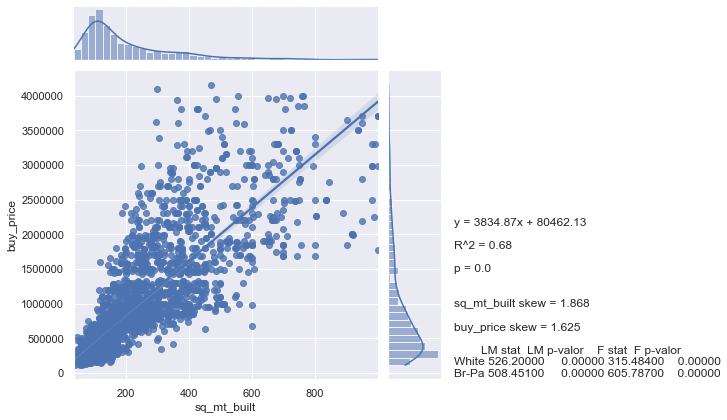

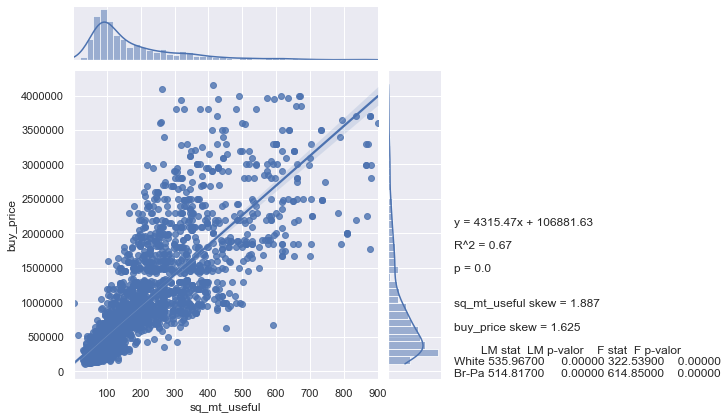

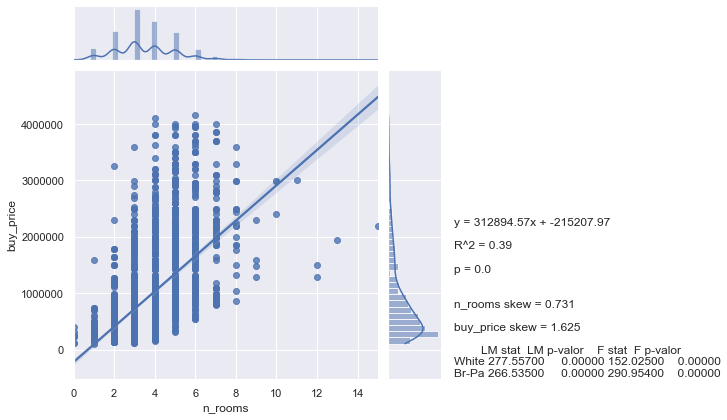

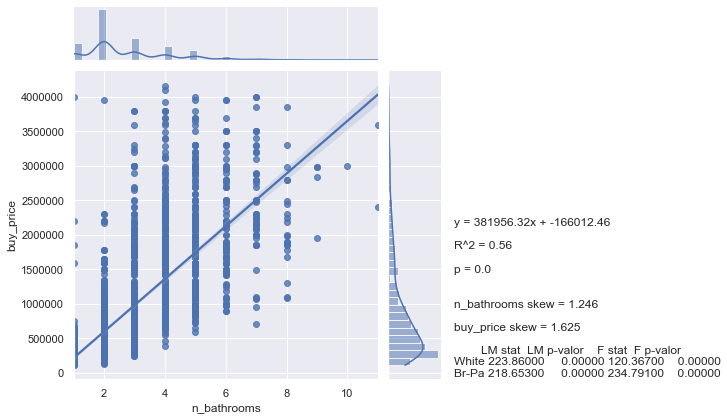

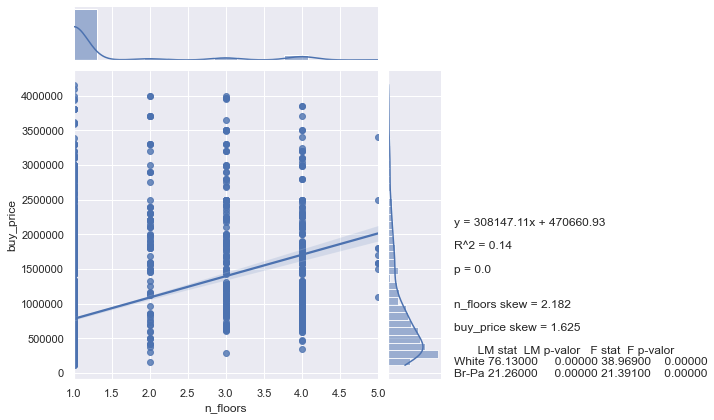

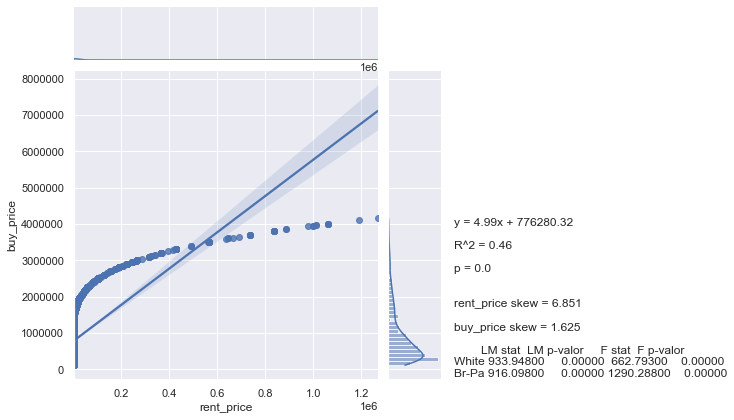

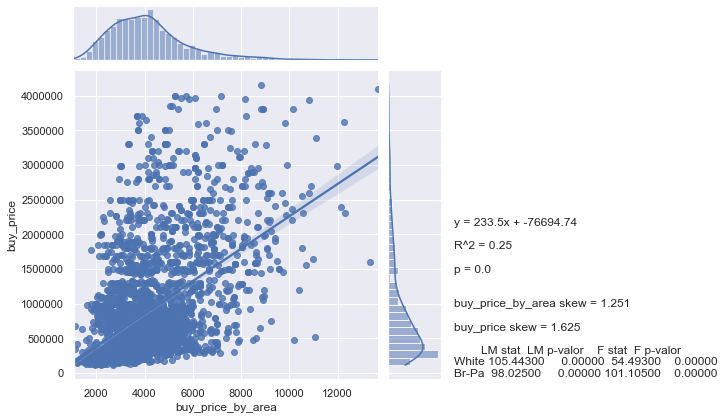

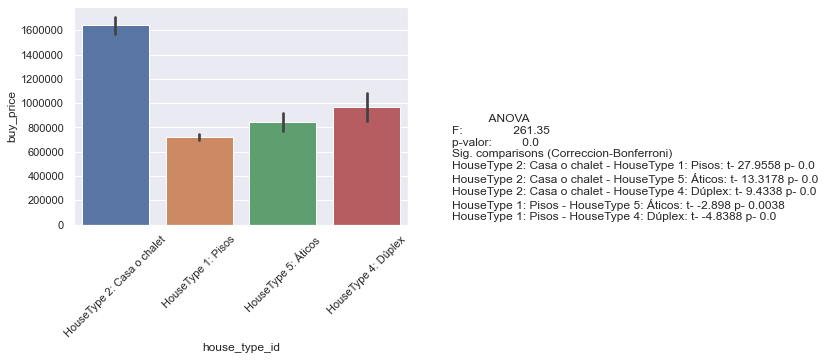

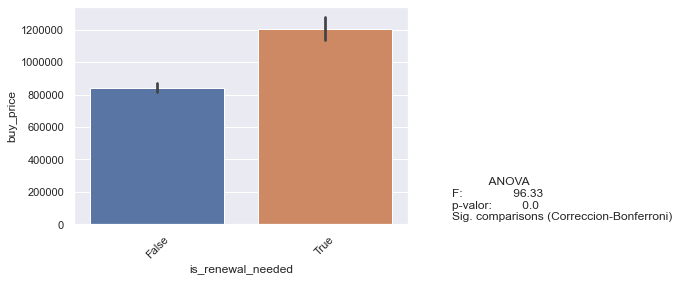

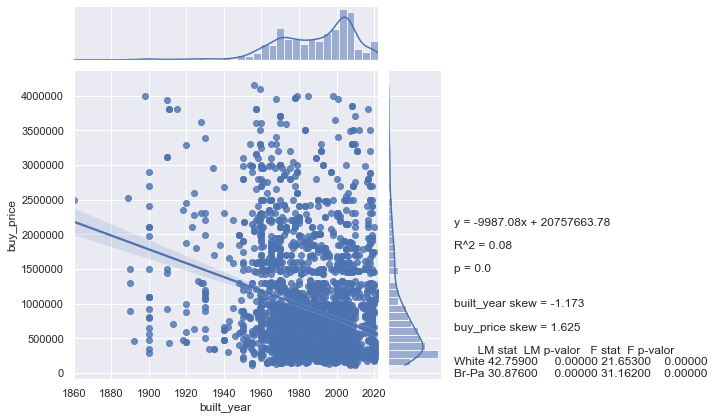

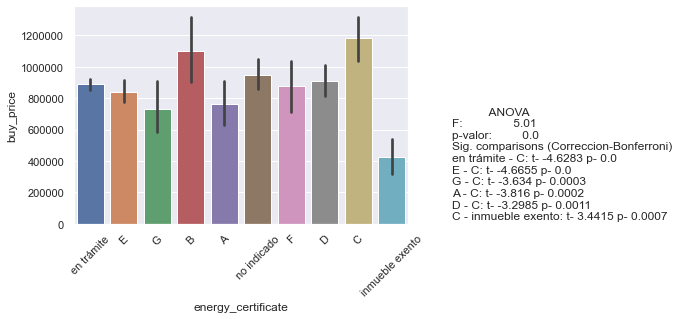

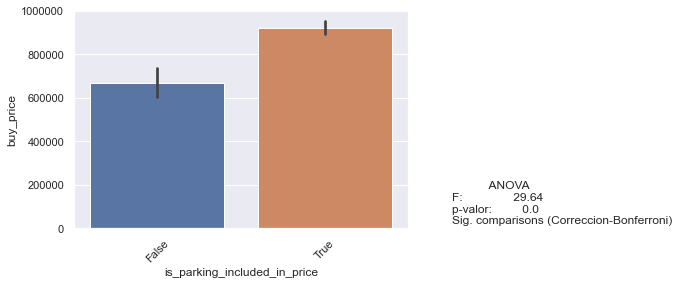

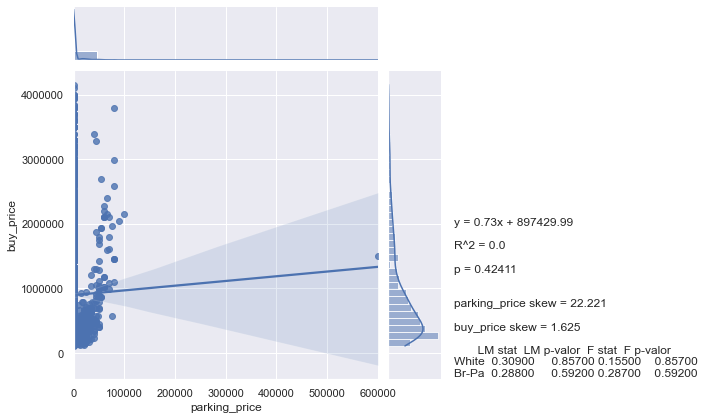

,Stat,+/-,ValorAbs,p-valor
sq_mt_built,r,+,0.82500,0.00000
sq_mt_useful,r,+,0.82100,0.00000
n_bathrooms,r,+,0.75000,0.00000
rent_price,r,+,0.67900,0.00000
n_rooms,r,+,0.62700,0.00000
buy_price_by_area,r,+,0.50500,0.00000
n_floors,r,+,0.37900,0.00000
built_year,r,-,0.28300,0.00000
parking_price,r,+,0.01400,0.42411
house_type_id,F,,261.35400,0.00000


In [812]:
bivastats(work_df,'buy_price')

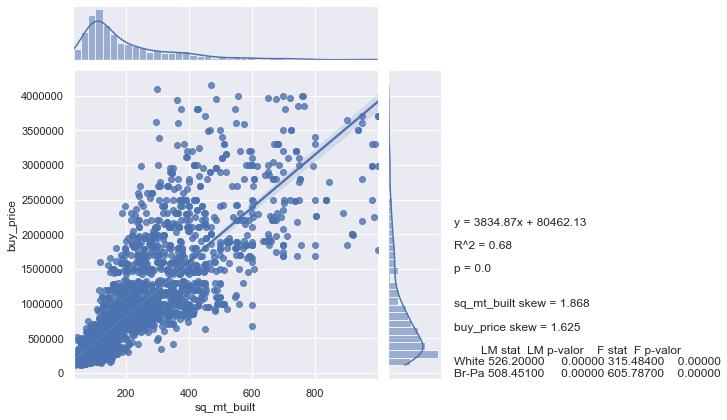

In [806]:
def scatter(feature, label):
    import seaborn as sns
    from scipy import stats
    import matplotlib.pyplot as plt
    import pandas as pd
    
    #Calculando la regresion
    m,b,r,p,err = stats.linregress(feature,label)
    
    textstr = 'y = ' + str(round(m,2)) + 'x + ' + str(round(b,2)) +'\n'
    textstr +='\n'
    textstr += 'R^2 = ' + str(round(r**2,2))+'\n'
    textstr +='\n'
    textstr += 'p = ' + str(round(p,5)) +'\n'
    textstr +='\n'
    textstr +='\n'
    textstr += str(feature.name) +' skew = ' +str(round(feature.skew(),3))+'\n'
    textstr +='\n'
    textstr += str(label.name) +' skew = ' +str(round(label.skew(),3))+'\n'
    textstr +='\n'
    textstr += str(heterocedasticidad(pd.DataFrame(label).join(pd.DataFrame(feature)),feature.name,label.name))
    
    sns.set(color_codes = True)
    ax = sns.jointplot(feature,label,kind='reg')
    plt.ticklabel_format(style='plain')
    
    ax.fig.text(1, 0.114, textstr, fontsize = 12, transform = plt.gcf().transFigure)
    
    plt.show()
    
    
scatter(work_df['sq_mt_built'],work_df.buy_price)

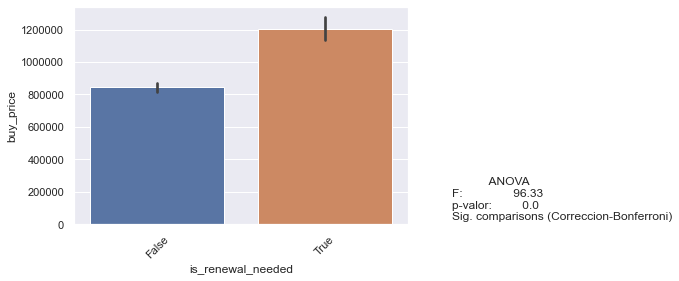

In [811]:
def bar_chart( df, feature, label):
    import seaborn as sns
    from scipy import stats
    import matplotlib.pyplot as plt
    import pandas as pd
    
    
    
    #La misma tecnica que se aplico en el bivstats para dinamicamente
    #adicionar multiples listas de valores de label por cada categoria
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:             
        
        g_list = df_grouped.get_group(g)  
                                    
        group_labels.append(g_list[label])
        
    #Ahora se calcula el resulado del ANOVA
    oneway = stats.f_oneway(*group_labels)
    
    #Luego se calcula los t-test con la correccion de Bonferroni para los limites del p-valor
    unique_groups = df[feature].unique()
    ttests =[]
    
    for i,group in enumerate(unique_groups):
        for i2,group_2 in enumerate(unique_groups):
            if i2>i:
                type_1 = df[df[feature]==group]
                type_2 = df[df[feature]==group_2]
                
                # Debe haber mas de un caso por grupo para realizar el test
                if len(type_1[label])<2 or len(type_2[label])<2:
                    print(" ' "+ group + " 'n = " +str(len(type_1)) + "; ' "+ group_2 + " 'n = " +str(len(type_2)) + "; no t-test performed" )
                else:
                    t,p = stats.ttest_ind(type_1[label],type_2[label])

                    ttests.append([group,group_2,t.round(4),p.round(4)])
                    
    if len(ttests)>0: #Evitando dividir por 0
        p_threshold = 0.05/len(ttests) #p-valor determinado a partir de la correccion Bonferroni
    else:
        p_threshold = 0.05
        
        
    #Adicionar todos los valores estadisticos al diagrama
    textstr ='           ANOVA'+'\n'
    textstr += 'F:               ' + str(oneway[0].round(2)) +'\n'
    textstr += 'p-valor:         ' + str(oneway[1].round(2)) +'\n'
    textstr += 'Sig. comparisons (Correccion-Bonferroni)'+'\n'
    
    try:

        for ttest in ttests:
            if ttest[3] <= p_threshold:
                textstr += ttest[0]+ ' - ' + ttest[1] + ': t- ' + str(ttest[2]) + ' p- ' + str(ttest[3]) + '\n'

    except:
        pass
    
    means = df.groupby(feature).mean()[label].round(2)
    
    ax = sns.barplot(df[feature],df[label])
    #ax.title(label + ' by ' + feature)
    #plt.xlabel(feature)
    #plt.ylabel(label)
    
    ax.text(1, 0.1, textstr, fontsize = 12, transform = plt.gcf().transFigure)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    
bar_chart(work_df,'is_renewal_needed','buy_price')

In [795]:
work_df.groupby('house_type_id').groups.keys()

dict_keys(['HouseType 1: Pisos', 'HouseType 2: Casa o chalet', 'HouseType 4: Dúplex', 'HouseType 5: Áticos'])

## Heterocedasticidad

 La heterocedasticidad es, en estadística, cuando los errores no son constantes a lo largo de toda la muestra. El término es contrario a homocedasticidad. En otras palabras, en los modelos de regresión lineales se dice que hay heterocedasticidad cuando la varianza de los errores no es igual en todas las observaciones realizadas. Así, no se cumple uno de los requisitos básicos de las hipótesis de los modelos lineales.

#### Consecuencias de la heterocedasticidad

Las consecuencias que emanan del incumplimiento de las hipótesis de heterocedasticidad en los resultados sobre la EMC (estimación de mínimos cuadrados) son:
* Existen errores en los cálculos del estimador de la matriz de varianzas y covarianzas de los estimadores de mínimos cuadrados.
* Se suele perder eficiencia sobre el estimador cuadrático mínimo.


En general, y al margen de lo anterior, los estimadores de mínimos cuadrados siguen siendo insesgados, aunque ya no eficientes. Esto es, que los estimadores ya no tendrán varianza mínima

In [790]:
def  heterocedasticidad(df,feature,label):
    #Aqui label y feature son strings
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    import pandas as pd
    
    #Resolviendo el modelo en cuestión
    model = ols(formula=label+'~'+feature, data= df).fit()
    
    white_test = het_white(model.resid , model.model.exog)
    bp_test = het_breuschpagan(model.resid , model.model.exog)
    
    output_df = pd.DataFrame(columns=['LM stat','LM p-valor','F stat','F p-valor'])
    output_df.loc['White'] = white_test
    output_df.loc['Br-Pa'] = bp_test #Breusch-Pagan
    
    return output_df.round(3)
    
    
    

## Análisis de cada tipo de variable

### Numerical Variables

In [502]:
# lista de variables numericas 
numerical_var = [var for var in work_df.columns if work_df[var].dtypes != 'O' and work_df[var].dtypes !='bool']

print('Number of numerical variables: ', len(numerical_var))

# Vista previa
work_df[numerical_var].head()

Number of numerical variables:  10


,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,rent_price,buy_price,buy_price_by_area,built_year,parking_price
id,,,,,,,,,,
2,289.000,254.320,4,3,3,2115.000,695000.000,2405.000,1981,0.000
3,175.000,154.000,4,2,1,2081.000,680000.000,3886.000,2002,0.000
4,96.000,83.000,2,2,1,1496.000,425000.000,4427.000,2002,0.000
5,78.000,68.640,2,2,1,1323.000,350000.000,4487.000,2020,0.000
10,74.000,65.120,2,1,1,1037.000,239500.000,3236.000,1988,0.000


Analicemos primeramente la variable temporal built_year para analizar si existe una relación entre cuendo fue construida y el precio actual. 

Text(0.5, 1.0, 'House Price vs Year Built')

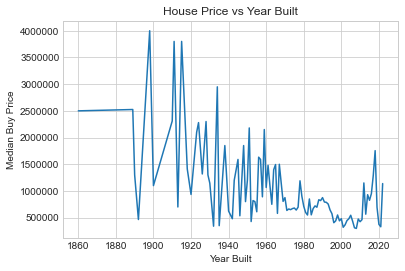

In [503]:
work_df.groupby('built_year')['buy_price'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median Buy Price')
plt.ticklabel_format(style='plain')
plt.title("House Price vs Year Built")



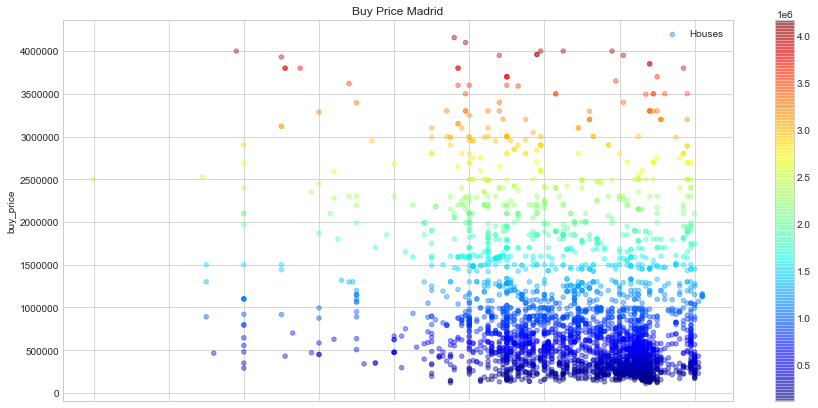

In [504]:
var = 'built_year'
work_df.plot(kind="scatter", x=var, y='buy_price',
    c=work_df['buy_price'], cmap=plt.get_cmap("jet"),
        label='Houses', title='Buy Price Madrid',colorbar=True, alpha=0.4, figsize=(15,7))
plt.ticklabel_format(style='plain')
plt.legend()

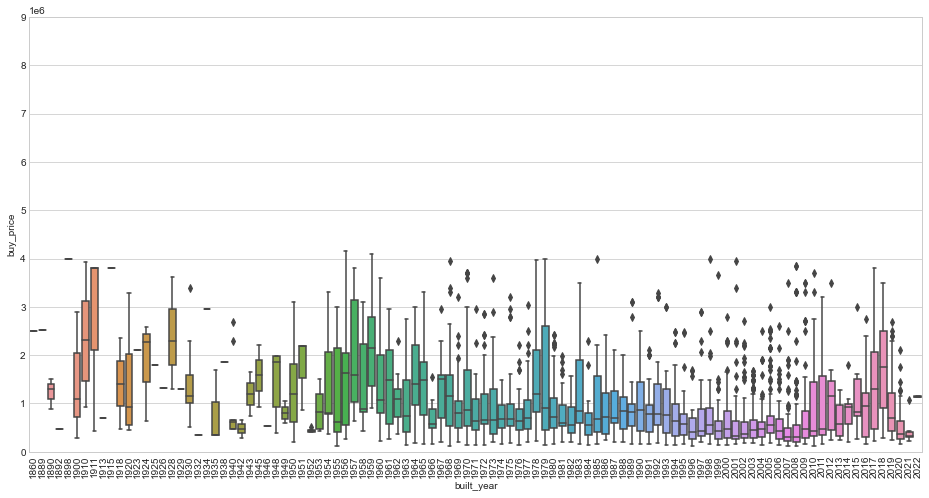

In [507]:
var = 'built_year'
data = pd.concat([work_df['buy_price'], work_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="buy_price", data=data)
fig.axis(ymin=0, ymax=9000000);
plt.xticks(rotation=90);

 ### En las variables numéricas siempre hay 2 tipos. Variables continuas y variables discretas.

### Variables Discretas

In [508]:
#Sin la variable built_year
discrete_var=[var for var in numerical_var 
              if len(work_df[var].unique())<25 and var not in ['built_year']+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_var)))



Discrete Variables Count: 3


In [432]:
discrete_var

['n_rooms', 'n_bathrooms', 'n_floors']

In [434]:
work_df[discrete_var].head()

,n_rooms,n_bathrooms,n_floors
id,,,
2,4,3,3
3,4,2,1
4,2,2,1
5,2,2,1
10,2,1,1


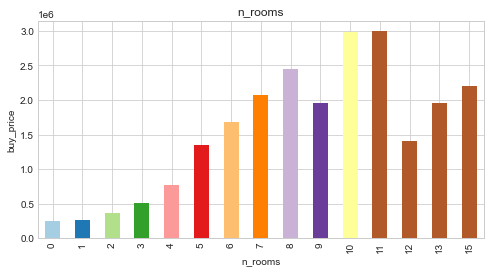

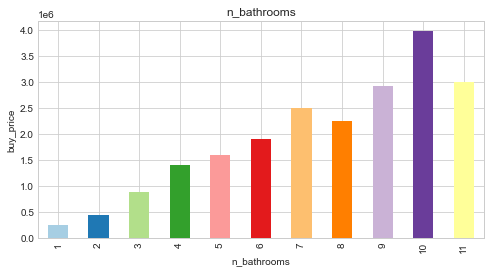

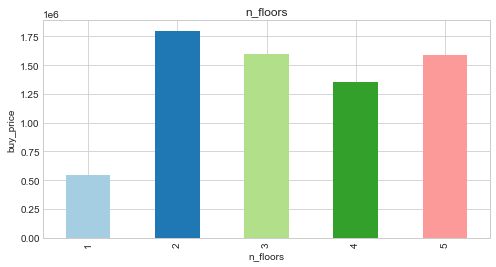

In [457]:
## Veamos la relación entre estas variables discretas y buy_price

for var in discrete_var:
    data=work_df.copy()
    
    fig, ax = plt.subplots()
    ax = data.groupby(var)['buy_price'].median().plot(kind='bar',
                                                 figsize=(8, 4), 
                                                 label='index', 
                                                 color=plt.cm.Paired(np.arange(len(data))))
    plt.xlabel(var)
    plt.ylabel('buy_price')
    plt.title(var)
    plt.show()

### Variables Continuas

In [459]:
continuous_var=[var for var in numerical_var if var not in discrete_var+['built_year']+['Id']]
print("Continuous feature Count {}".format(len(continuous_var)))

Continuous feature Count 6


In [466]:
work_df[continuous_var].headad()

,sq_mt_built,sq_mt_useful,rent_price,buy_price,buy_price_by_area,parking_price
id,,,,,,
2,289.000,254.320,2115.000,695000.000,2405.000,0.000
3,175.000,154.000,2081.000,680000.000,3886.000,0.000
4,96.000,83.000,1496.000,425000.000,4427.000,0.000
5,78.000,68.640,1323.000,350000.000,4487.000,0.000
10,74.000,65.120,1037.000,239500.000,3236.000,0.000


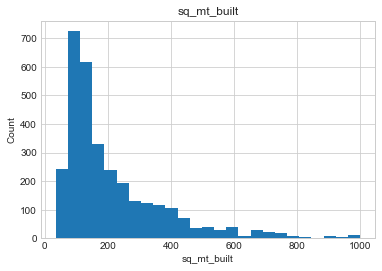

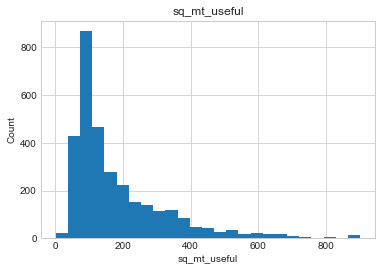

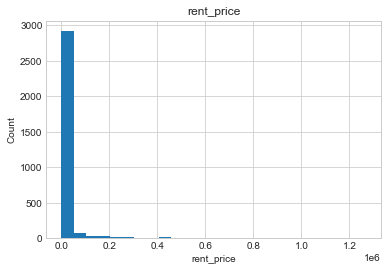

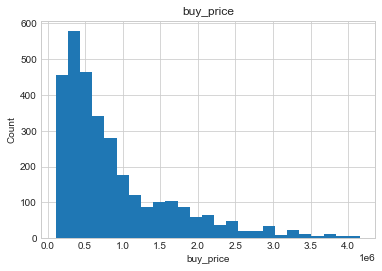

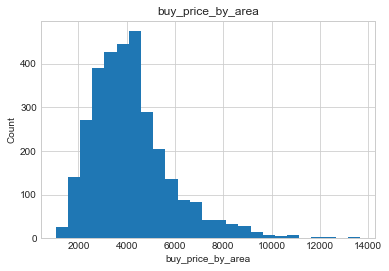

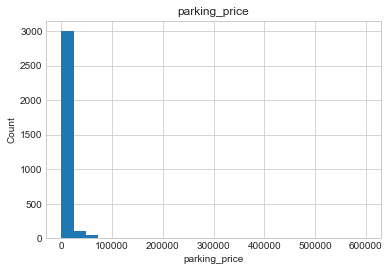

In [509]:
## Analicemos las variables continuas a partir histogramas para entender su distribucion


for var in continuous_var:
    data=work_df.copy()
    data[var].hist(bins=25)
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title(var)
    plt.show()


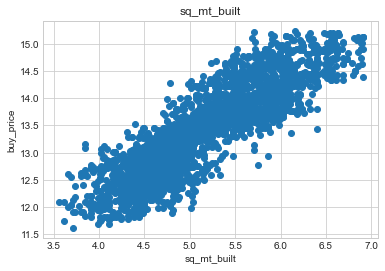

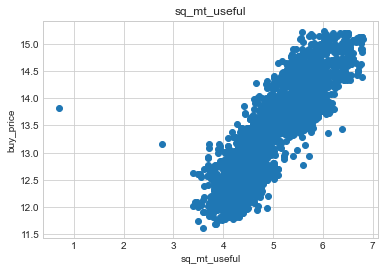

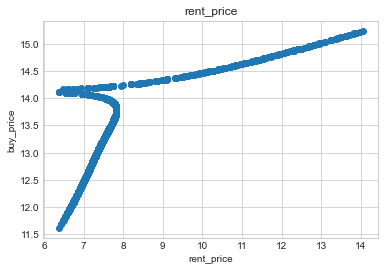

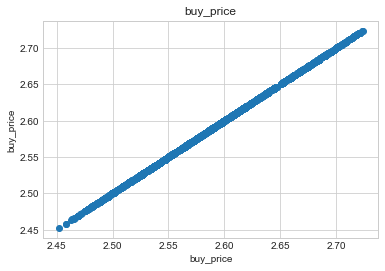

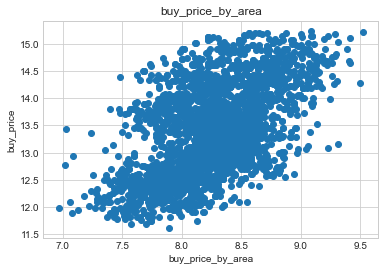

In [511]:

for var in continuous_var:
    data=work_df.copy()
    if 0 in data[var].unique():
        pass
    else:
        data[var]=np.log(data[var])
        data['buy_price']=np.log(data['buy_price'])
        plt.scatter(data[var],data['buy_price'])
        plt.xlabel(var)
        plt.ylabel('buy_price')
        plt.title(var)
        plt.show()
        

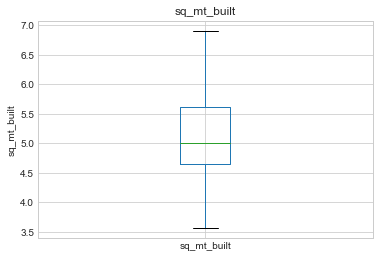

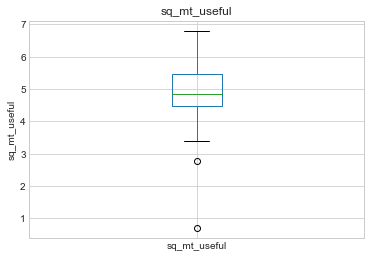

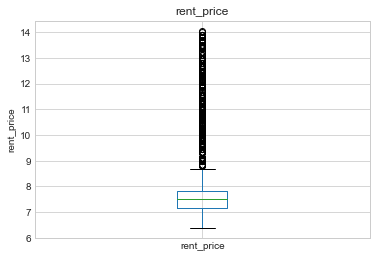

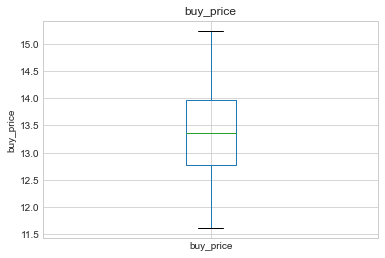

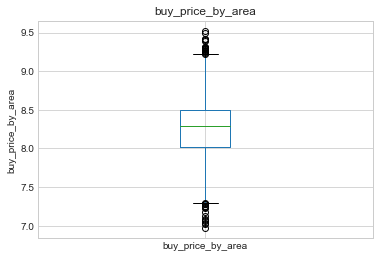

In [512]:
for var in continuous_var:
    data=work_df.copy()
    if 0 in data[var].unique():
        pass
    else:
        data[var]=np.log(data[var])
        data.boxplot(column=var)
        plt.ylabel(var)
        plt.title(var)
        plt.show()

In [516]:
categorical_var=[var for var in work_df.columns if work_df[var].dtypes=='O' or work_df[var].dtypes=='bool']
categorical_var

['operation',
 'is_rent_price_known',
 'is_buy_price_known',
 'house_type_id',
 'is_renewal_needed',
 'is_new_development',
 'energy_certificate',
 'has_parking',
 'is_parking_included_in_price']

In [517]:
for var in categorical_var:
    print('The feature is {} and number of categories are {}'.format(var,len(work_df[var].unique())))

The feature is operation and number of categories are 1
The feature is is_rent_price_known and number of categories are 1
The feature is is_buy_price_known and number of categories are 1
The feature is house_type_id and number of categories are 4
The feature is is_renewal_needed and number of categories are 2
The feature is is_new_development and number of categories are 1
The feature is energy_certificate and number of categories are 10
The feature is has_parking and number of categories are 1
The feature is is_parking_included_in_price and number of categories are 2


In [539]:
dataf = work_df.copy()
for i in categorical_var:
    if dataf[i].nunique()==1:
        dataf.drop(i,axis='columns',inplace=True)
        

In [540]:
work_df = dataf

In [542]:
categorical_var=[var for var in work_df.columns if work_df[var].dtypes=='O' or work_df[var].dtypes=='bool']
categorical_var

['house_type_id',
 'is_renewal_needed',
 'energy_certificate',
 'is_parking_included_in_price']

In [543]:
for var in categorical_var:
    print('The feature is {} and number of categories are {}'.format(var,len(work_df[var].unique())))

The feature is house_type_id and number of categories are 4
The feature is is_renewal_needed and number of categories are 2
The feature is energy_certificate and number of categories are 10
The feature is is_parking_included_in_price and number of categories are 2


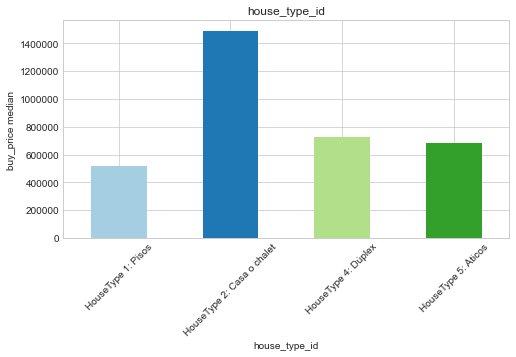

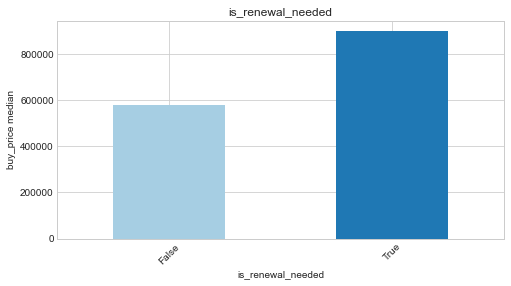

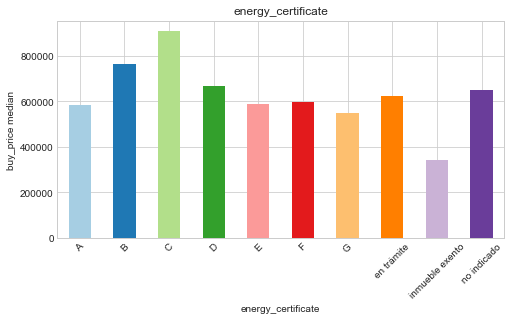

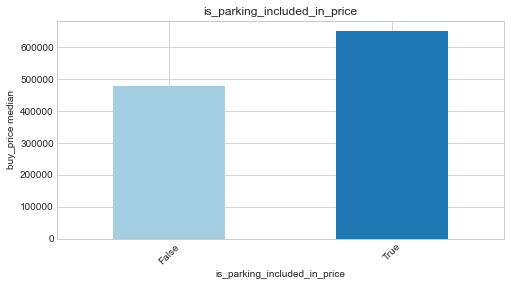

In [555]:
for var in categorical_var:
    data=work_df.copy()
    fig,ax = plt.subplots()
    data.groupby(var)['buy_price'].median().plot(kind='bar',
                                                 figsize=(8, 4), 
                                                 label='index', 
                                                 color=plt.cm.Paired(np.arange(len(data))))
    
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('buy_price median')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(var)
    plt.show()

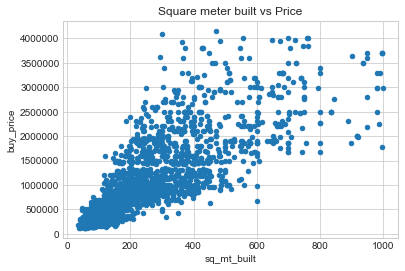

In [557]:
#scatter plot entre el precio de venta y los metros cuadrados útiles

work_df.plot.scatter(x= 'sq_mt_built' , y= 'buy_price')
plt.title('Square meter built vs Price')  
plt.xlabel('sq_mt_built')  
plt.ylabel('buy_price')
plt.ticklabel_format(style='plain')
plt.show()

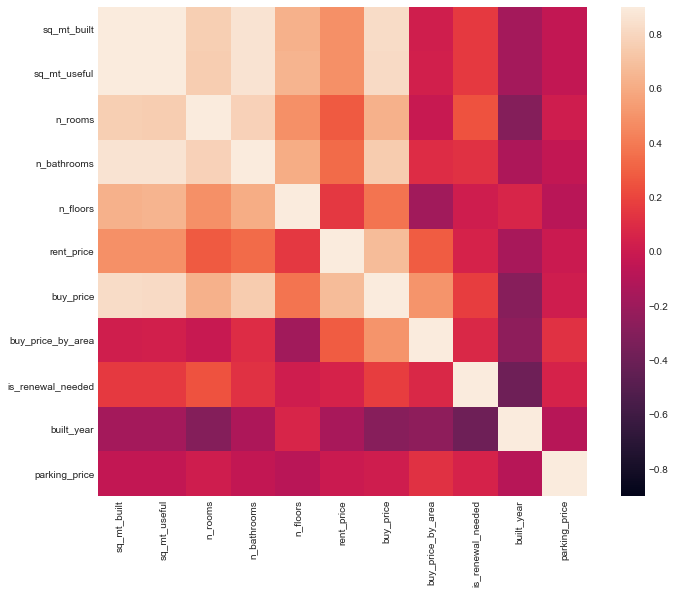

In [597]:
#Correlation matrix
corrmat = work_df.corr()
f, ax = plt.subplots(figsize =(12,9))
sns.heatmap(corrmat, vmax = .9, vmin = -.9, square = True);

In [651]:
#numerical_var.remove('buy_price')
a=['buy_price']
numerical_var = a+numerical_var

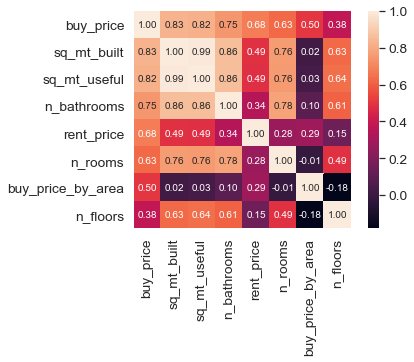

In [650]:

k= 8
cols = corrmat.nlargest(k,'buy_price')['buy_price'].index
cm = np.corrcoef(work_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, 
                 square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [657]:
corrdf = pd.DataFrame(columns=['r','p'])

for col in work_df[numerical_var].columns:
    if col != 'buy_price':
        r,p = stats.pearsonr(work_df.buy_price, work_df[col])
        corrdf.loc[col] = [round(r,3) , round(p,3)]
    
corrdf    

,r,p
sq_mt_built,0.825,0.000
sq_mt_useful,0.821,0.000
n_rooms,0.627,0.000
n_bathrooms,0.750,0.000
n_floors,0.379,0.000
rent_price,0.679,0.000
buy_price_by_area,0.505,0.000
built_year,-0.283,0.000
parking_price,0.014,0.424


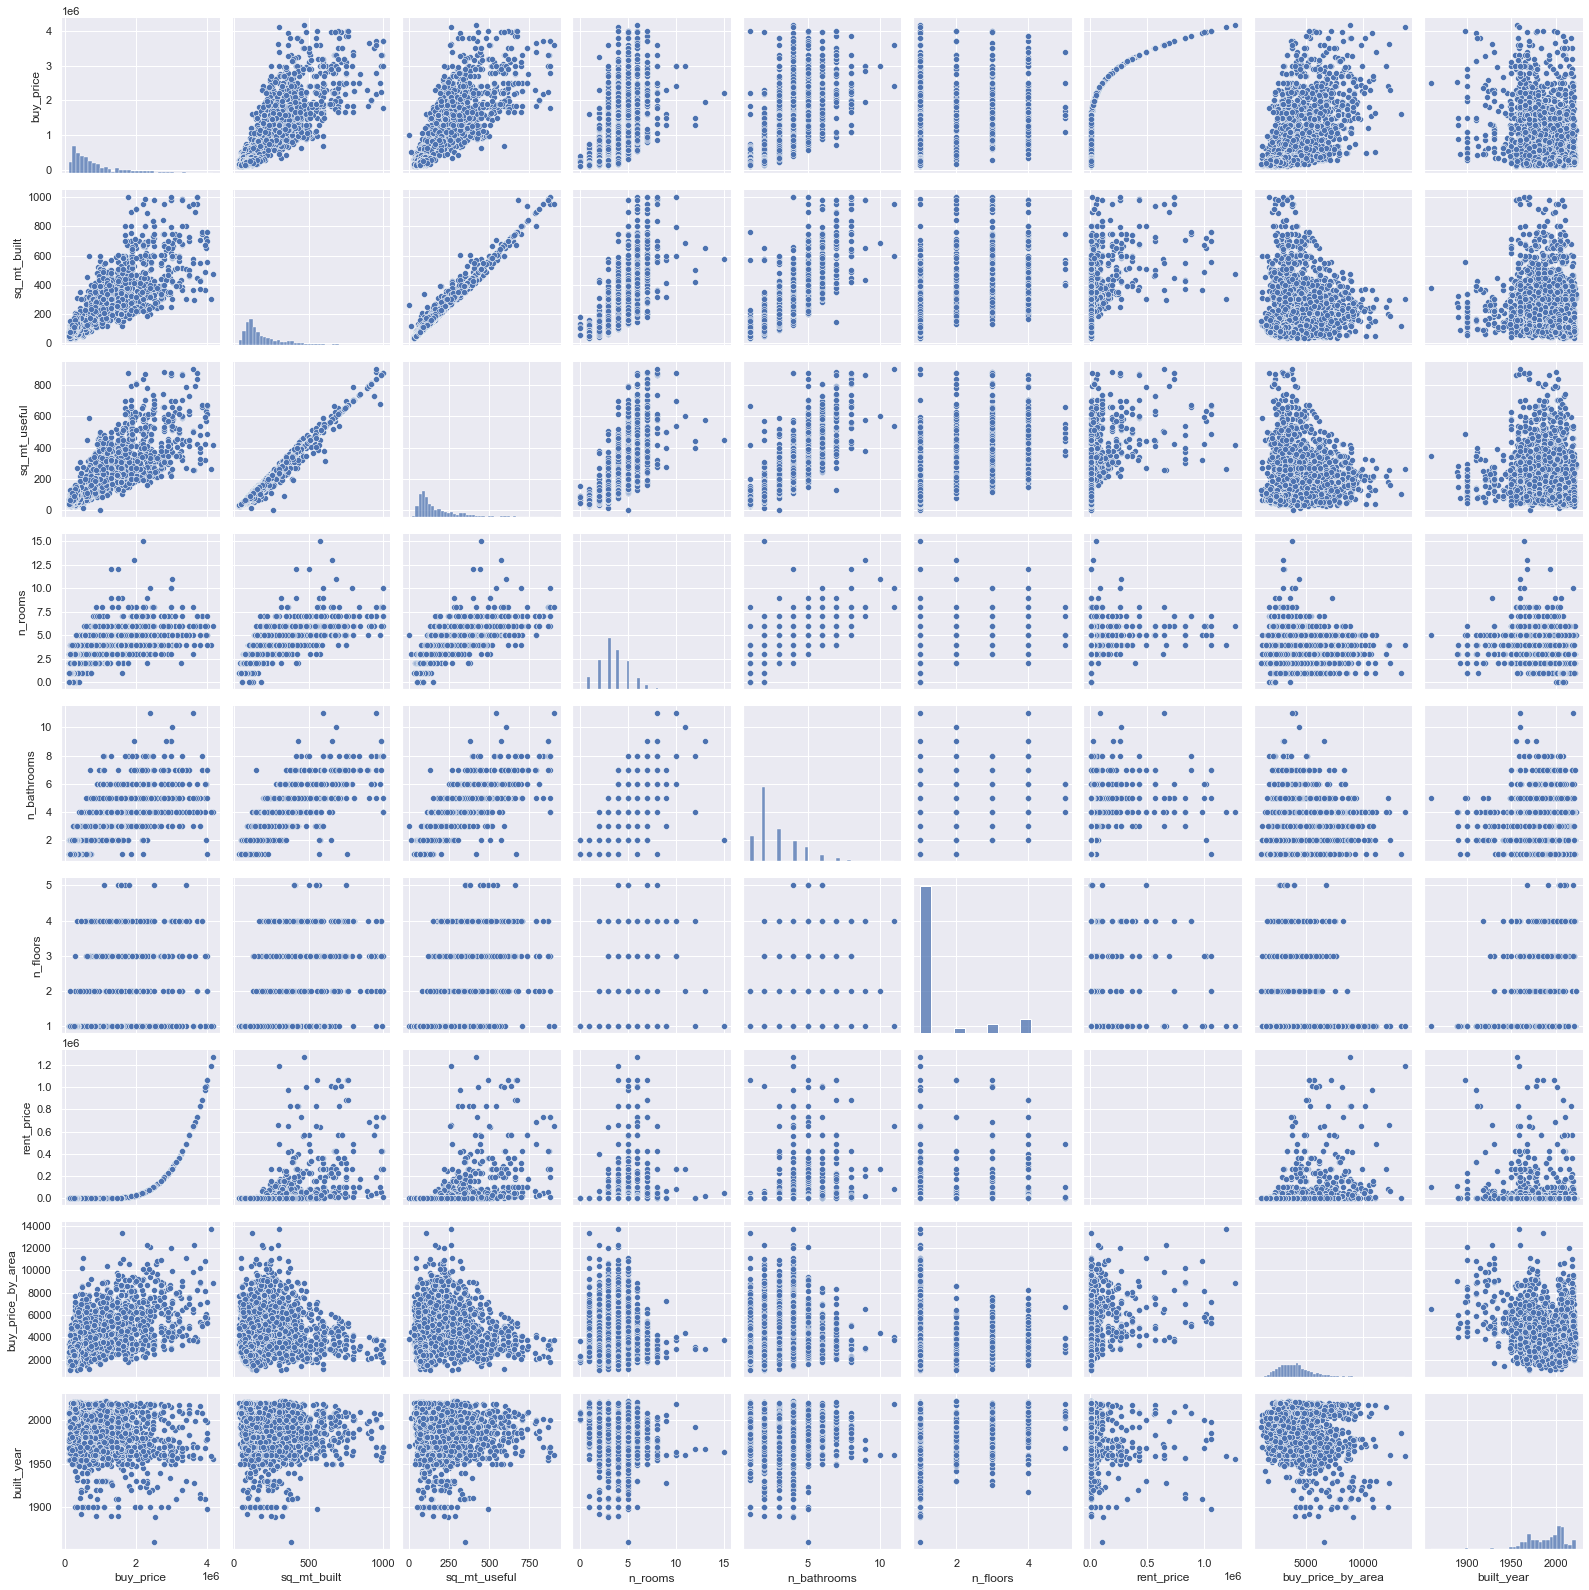

In [660]:
#scatterplots between 'SalePrice' and correlated variables 
sns.set()
col = numerical_var[:-1]
sns.pairplot(work_df[col], size = 2.5)
plt.show();

In [924]:
final_df=work_df.copy()

In [925]:
final_df = pd.get_dummies(work_df.copy(), columns=categorical_var,drop_first=True)

final_df

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,rent_price,buy_price,buy_price_by_area,built_year,parking_price,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,is_renewal_needed_True,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_F,energy_certificate_G,energy_certificate_en trámite,energy_certificate_inmueble exento,energy_certificate_no indicado,is_parking_included_in_price_True
id,,,,,,,,,,,,,,,,,,,,,,,,
2,289.00000,254.32000,4,3,3,2115.00000,695000.00000,2405.00000,1981,0.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,175.00000,154.00000,4,2,1,2081.00000,680000.00000,3886.00000,2002,0.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,96.00000,83.00000,2,2,1,1496.00000,425000.00000,4427.00000,2002,0.00000,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,78.00000,68.64000,2,2,1,1323.00000,350000.00000,4487.00000,2020,0.00000,0,0,1,0,0,0,0,0,0,0,1,0,0,1
10,74.00000,65.12000,2,1,1,1037.00000,239500.00000,3236.00000,1988,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21697,83.00000,69.00000,2,2,1,1004.00000,228273.00000,2750.00000,2020,0.00000,0,0,1,0,0,0,0,0,0,0,1,0,0,1
21711,123.00000,108.24000,3,2,1,1195.00000,298000.00000,2423.00000,2002,0.00000,0,0,0,0,0,0,0,0,0,0,1,0,0,1
21716,75.00000,68.00000,3,1,1,698.00000,138000.00000,1840.00000,1984,0.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [863]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields], prefix="Var",drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [899]:
final_df = category_onehot_multcols(categorical_var)

house_type_id
is_renewal_needed
energy_certificate
is_parking_included_in_price


In [926]:
final_df.shape

(3154, 24)

In [927]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [928]:
final_df.shape

(3154, 24)

In [935]:
final_df.drop('parking_price',axis=1,inplace=True)

In [936]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154 entries, 2 to 21738
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   sq_mt_built                               3154 non-null   float64
 1   sq_mt_useful                              3154 non-null   float64
 2   n_rooms                                   3154 non-null   int64  
 3   n_bathrooms                               3154 non-null   int64  
 4   n_floors                                  3154 non-null   int64  
 5   rent_price                                3154 non-null   float64
 6   buy_price                                 3154 non-null   float64
 7   buy_price_by_area                         3154 non-null   float64
 8   built_year                                3154 non-null   int64  
 9   house_type_id_HouseType 2: Casa o chalet  3154 non-null   uint8  
 10  house_type_id_HouseType 4: Dúplex  

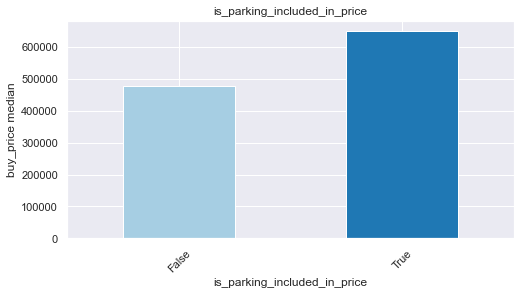

In [908]:
var='is_parking_included_in_price'

data=work_df.copy()
fig,ax = plt.subplots()
data.groupby(var)['buy_price'].median().plot(kind='bar',
                                             figsize=(8, 4), 
                                             label='index', 
                                             color=plt.cm.Paired(np.arange(len(data))))

plt.xticks(rotation=45)
plt.xlabel(var)
plt.ylabel('buy_price median')
plt.ticklabel_format(style='plain', axis='y')
plt.title(var)
plt.show()

In [937]:
final_df=final_df2

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# split into inpiut and output elements
y, X =  final_df['buy_price'], final_df.drop('buy_price',axis='columns')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [938]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [960]:
result = model.fit(X_train,y_train)

In [961]:
# Evaluate the model
yhat = model.predict(X_test)

In [941]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 115959.649


In [942]:
model.score(X_train,y_train)

0.9530896981624913

In [948]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [955]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.951 (0.009)
MSE: -28267052731.213 (5363675082.490)


In [950]:
import pickle

In [962]:
with open('model_madrid_housing', 'wb') as f:
    pickle.dump(model,f)

In [963]:
with open('model_madrid_housing', 'rb') as f:
    loadModel = pickle.load(f)

In [964]:
loadModel.predict(X_train)

array([ 660953.28584353,  474193.59119242, 2230664.36766813, ...,
        110552.99922405,   19192.8126105 , 4891809.89794398])